# **ANÁLISIS EXPLORATORIO DE DATOS**
---
- **Nombre del proyecto**: Detección de diabetes a partir de información médica y análisis de laboratorio
- **Elaborado por:** Pedro Alejandro Astaiza Perafán

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

## **1. Cargue de datos**
---

In [3]:
df_datos = pd.read_csv(r'\data\DatasetofDiabetes.csv')
df_datos

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


## **2. Revisión inicial de los datos**
---
- **Cantidad de datos**: 1000 filas y 13 columnas, 13000 registros
- **Datos nulos:** No hay datos nulos
- **Columnas numéricas:** ID, No_partion, Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL,BMI. De estso el ID y el No_pation corresponden a variables categóricas (ID de la prueba y Número de paciente), el resto corresponde a resultados de los exámenes.
- **Columnas letras o cadenas:** Gender, CLASS. La variable CLASS corresponde a la variable objetivo. 

In [21]:
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [43]:
df_datos[['Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL','BMI']].describe().loc[['mean','max','min']]

,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
mean,5.124743,68.943,8.28116,4.86282,2.34961,1.20475,2.60979,1.8547,29.57802
max,38.900000,800.000,16.00000,10.30000,13.80000,9.90000,9.90000,35.0000,47.75000
min,0.500000,6.000,0.90000,0.00000,0.30000,0.20000,0.30000,0.1000,19.00000


## **3. Análisis de la variable objetivo**
---
Se esperan tres categorías o clases:
- **Y:** Detectado 
- **N:** No detectado
- **P:** Previsto<br>

Del gráfico de barras de observa:
- Existen algunas categorías con algunos carácteres adicionales (espacios) y no se toman como iguales al momento del conteo. Se hace necesario limpiar los datos. 
- Hay desbalanceo de datos, la cantidad de clases **Y** es, aproximadamente, 8 veces la clase **N** y 16 veces la clase **P**. 

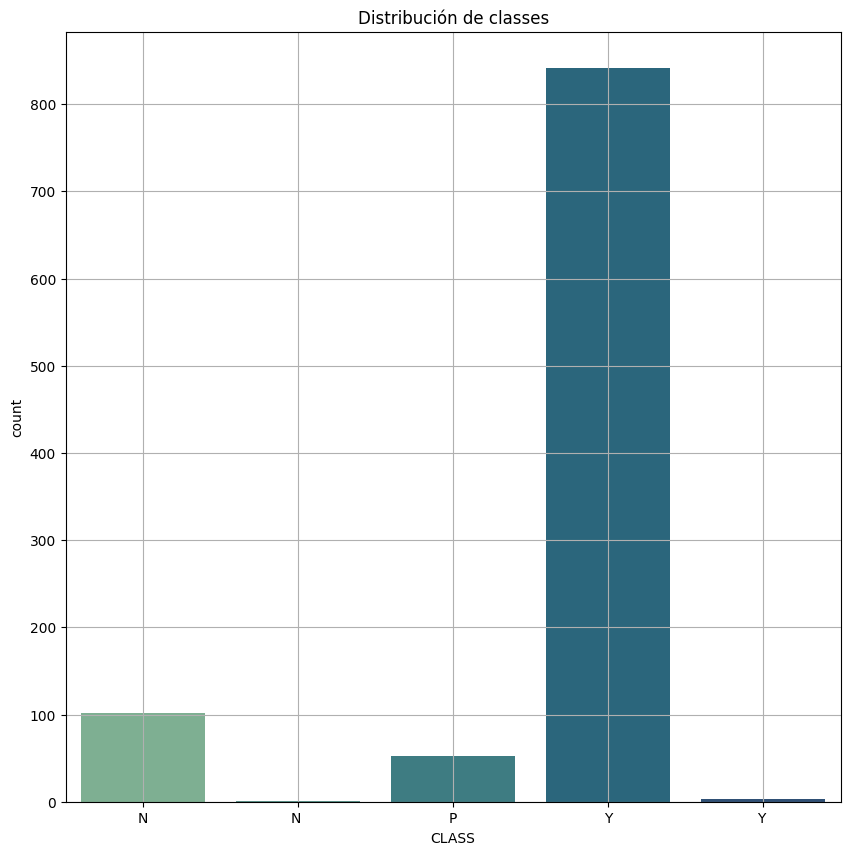

In [69]:
fig,ax = plt.subplots(figsize=(10,10))
sns.countplot(data=df_datos,
            x='CLASS',
            ax=ax,
            palette='crest')
ax.set_title('Distribución de classes')
ax.grid()
plt.savefig(r'\documents\Data_understanding\data_img\EDA_distribucion_clases_barplot.png')
plt.show()

## **4. Características.**
---

### **4.1. Categórica: Gender**

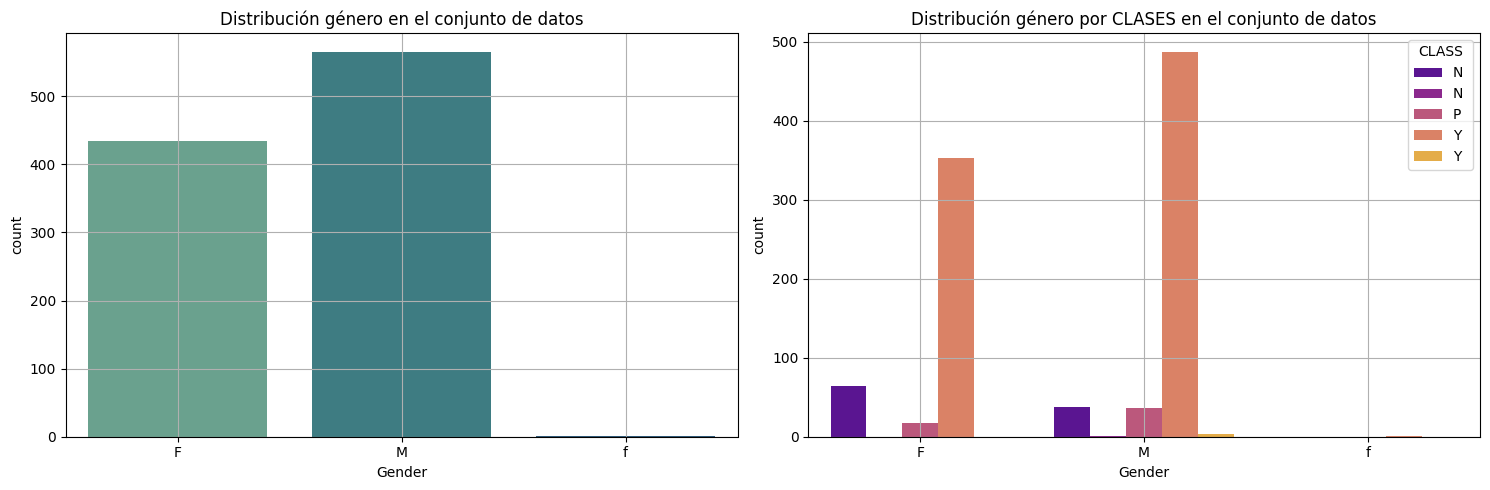

In [74]:

# Distribución para las variables categóricas: género o Gender
fig,ax = plt.subplots(ncols=2,figsize=(15,5))
sns.countplot(data=df_datos,
              x='Gender',
              palette='crest',
              ax=ax[0])
ax[0].set_title('Distribución género en el conjunto de datos')
ax[0].grid()
sns.countplot(data=df_datos,
              x='Gender',
              palette='plasma',
              hue='CLASS',
              ax=ax[1])
ax[1].set_title('Distribución género por CLASES en el conjunto de datos')
ax[1].grid()
fig.tight_layout()
plt.savefig(r'\documents\Data_understanding\data_img\EDA_distribución_genero_countplot.png')
plt.show()


### **4.2. Edad (AGE)**

In [103]:
df_datos.AGE.describe()

count    1000.000000
mean       53.528000
std         8.799241
min        20.000000
25%        51.000000
50%        55.000000
75%        59.000000
max        79.000000
Name: AGE, dtype: float64

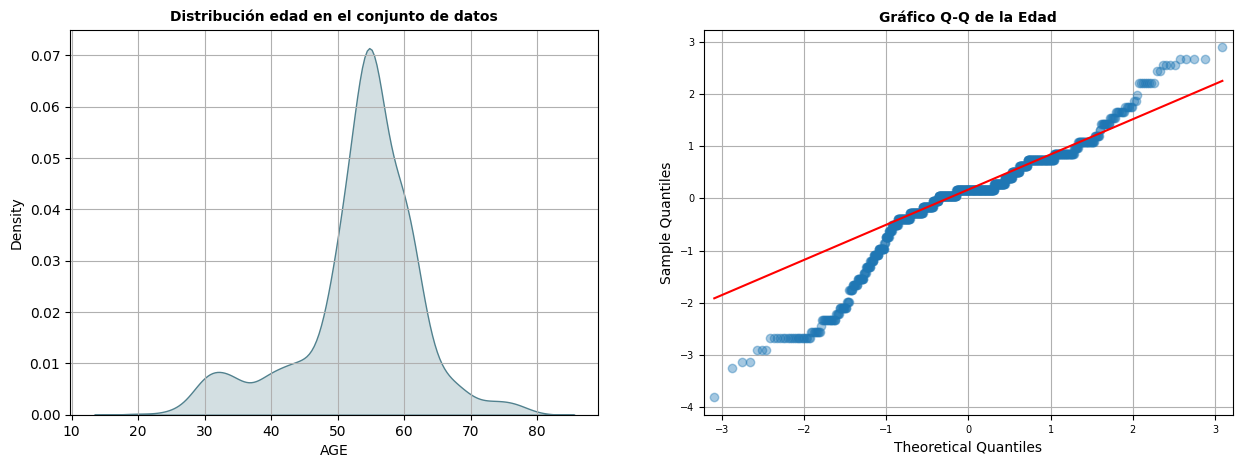

In [51]:
fig,ax = plt.subplots(ncols=2,figsize=(15,5))
sns.kdeplot(data=df_datos,
              x='AGE',
              ax=ax[0],
              color='#51818E',
              fill=True)
ax[0].set_title('Distribución edad en el conjunto de datos',fontsize = 10,fontweight = "bold")
ax[0].grid()
sm.qqplot(df_datos['AGE'],
                  fit=True,
                  line='q',
                  alpha=0.4,
                  lw=2,
                  ax= ax[1])
ax[1].set_title(f'Gráfico Q-Q de la Edad', fontsize = 10,fontweight = "bold")
ax[1].tick_params(labelsize = 7)
ax[1].grid()
plt.savefig(r'\documents\Data_understanding\data_img\EDA_distribución_edad_histplot.png')
plt.show()

### **4.3. Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL,BMI**

In [4]:
df_datos_copy = df_datos[['Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL','BMI']]
df_datos_copy

,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0
...,...,...,...,...,...,...,...,...,...
995,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0
996,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2
997,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4
998,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5


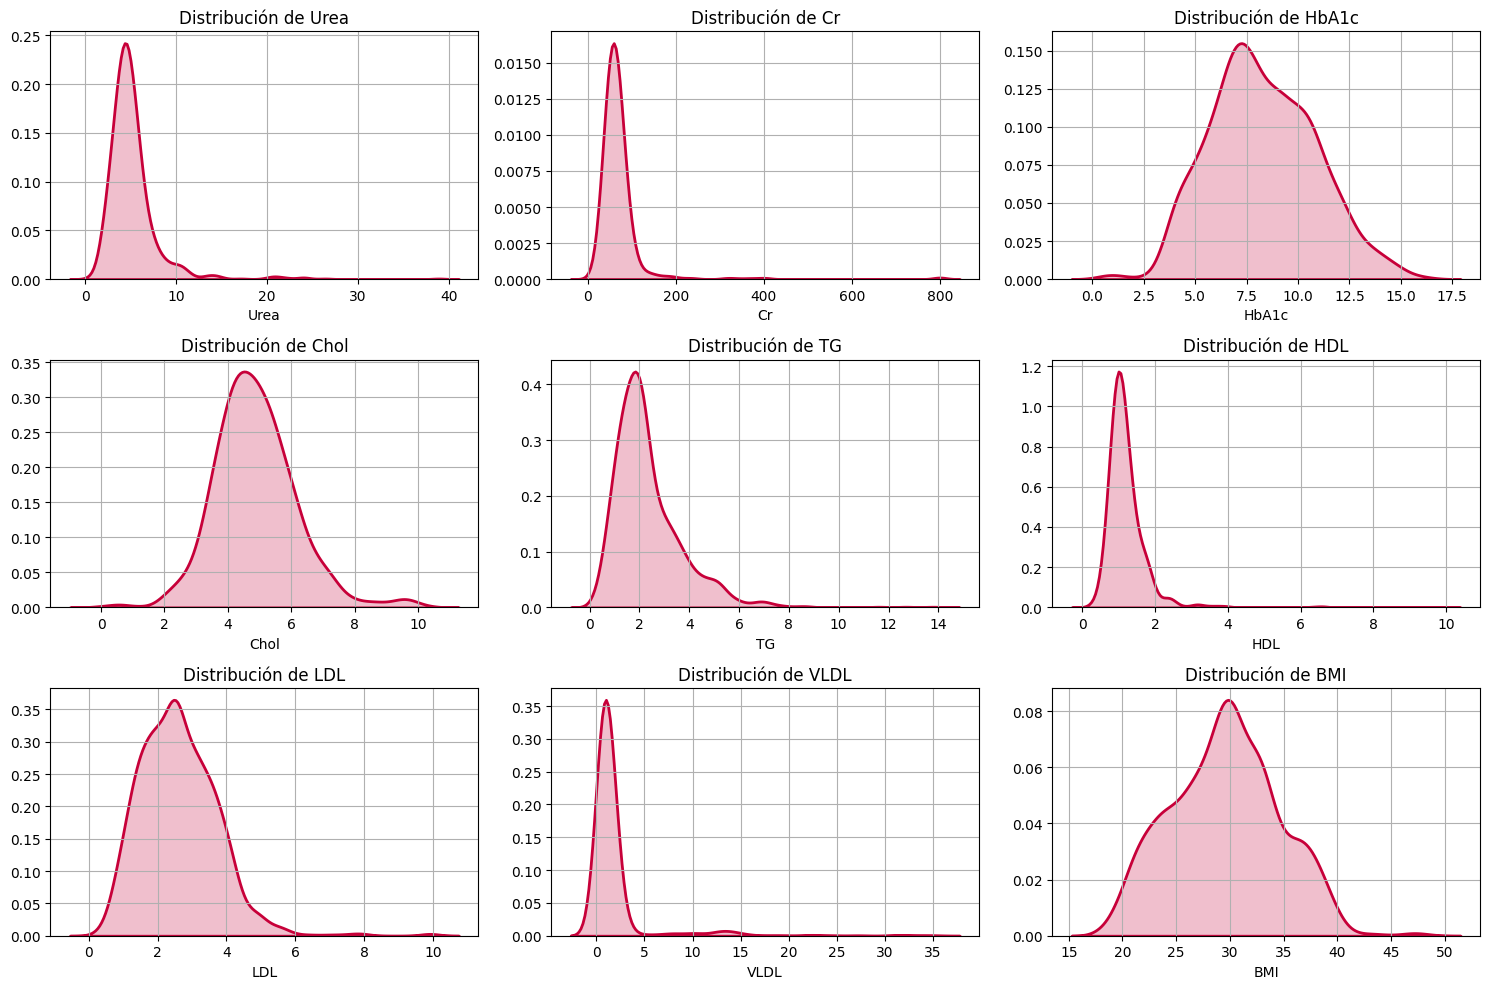

In [44]:
columnas = df_datos_copy.columns.values.reshape(3,3)
fig, ax = plt.subplots(ncols=3,nrows=3, figsize=(15,10))
for i in range(3):
    for j in range(3):
        sns.kdeplot(data=df_datos_copy, x=columnas[i][j], ax=ax[i][j], fill=True,color='#C70039',linewidth=2)
        ax[i][j].grid()
        ax[i][j].set_title(f'Distribución de {columnas[i][j]}')
        ax[i][j].set_ylabel('')
plt.savefig(r'\documents\Data_understanding\data_img\EDA_distribución_características_kdeplot.png')
fig.tight_layout()
plt.show()


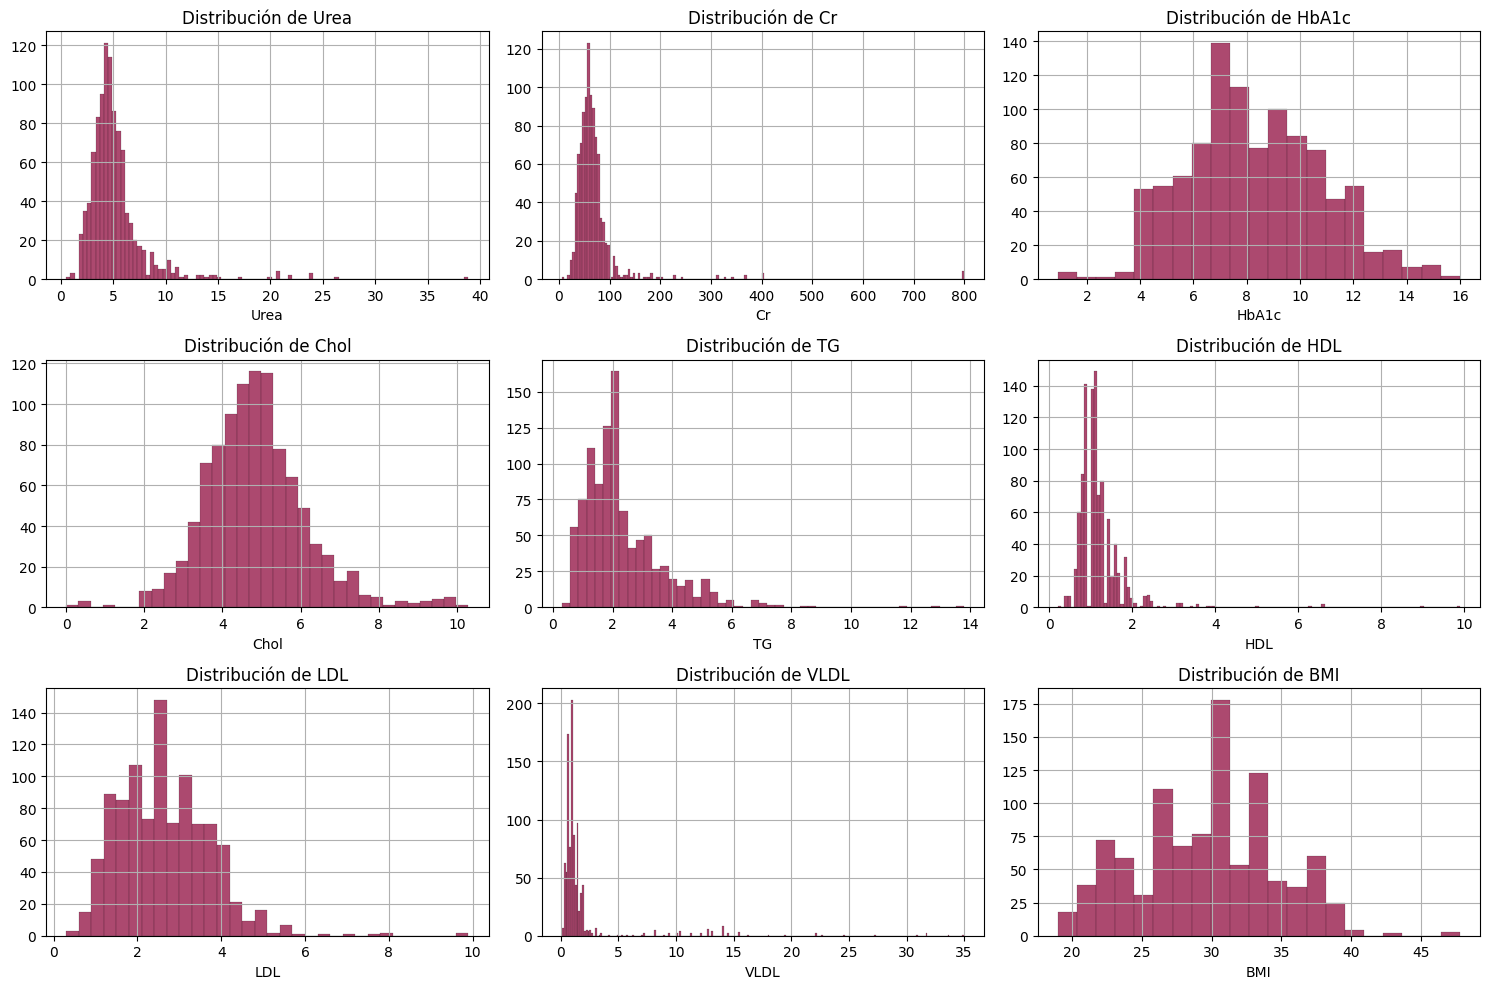

In [31]:
fig, ax = plt.subplots(ncols=3,nrows=3, figsize=(15,10))
for i in range(3):
    for j in range(3):
        sns.histplot(data=df_datos_copy, x=columnas[i][j], ax=ax[i][j], color='#900C3F',linewidth=0.1)
        ax[i][j].grid()
        ax[i][j].set_title(f'Distribución de {columnas[i][j]}')
        ax[i][j].set_ylabel('')
plt.savefig(r'\documents\Data_understanding\data_img\EDA_distribución_características_histplot.png')
fig.tight_layout()
plt.show()

#### **4.3.1. Pruebas de normalidad**

In [53]:
# Curtosis y Simetría
for columna in columnas.flatten():
    print(f'Kursotis: {stats.kurtosis(df_datos_copy[columna])} Skewness: {stats.skew(df_datos_copy[columna])}')

Kursotis: 30.269722437556858 Skewness: 4.292476809429299
Kursotis: 91.25095509867391 Skewness: 8.461434629424595
Kursotis: -0.255610669636126 Skewness: 0.22135672823168215
Kursotis: 1.908742266537348 Skewness: 0.6161965909228228
Kursotis: 10.20641971520473 Skewness: 2.2950069761427567
Kursotis: 62.31124107670833 Skewness: 6.27377251335791
Kursotis: 4.248417092103917 Skewness: 1.1441900071730886
Kursotis: 33.33815337935136 Skewness: 5.342415663445426
Kursotis: -0.3006590242386511 Skewness: 0.12561815051662148


In [39]:
# Test de Shapiro
for columna in columnas.flatten():
    print(f"{columna.upper():>10}{1*' ':>10}p-valor: {0.05}{1*' ':>10}Resultado de K-S: {stats.shapiro(df_datos_copy[columna].values).pvalue:>30} {stats.shapiro(df_datos_copy[columna].values).pvalue>0.05:>10}")

      UREA          p-valor: 0.05          Resultado de K-S:         1.9079239111168114e-40          0
        CR          p-valor: 0.05          Resultado de K-S:                            0.0          0
     HBA1C          p-valor: 0.05          Resultado de K-S:          6.001930614729645e-06          0
      CHOL          p-valor: 0.05          Resultado de K-S:          5.331957884111352e-14          0
        TG          p-valor: 0.05          Resultado de K-S:          2.852515952510476e-31          0
       HDL          p-valor: 0.05          Resultado de K-S:          3.923635700109488e-44          0
       LDL          p-valor: 0.05          Resultado de K-S:         2.1896615942439146e-19          0
      VLDL          p-valor: 0.05          Resultado de K-S:                            0.0          0
       BMI          p-valor: 0.05          Resultado de K-S:          1.841613261888142e-08          0


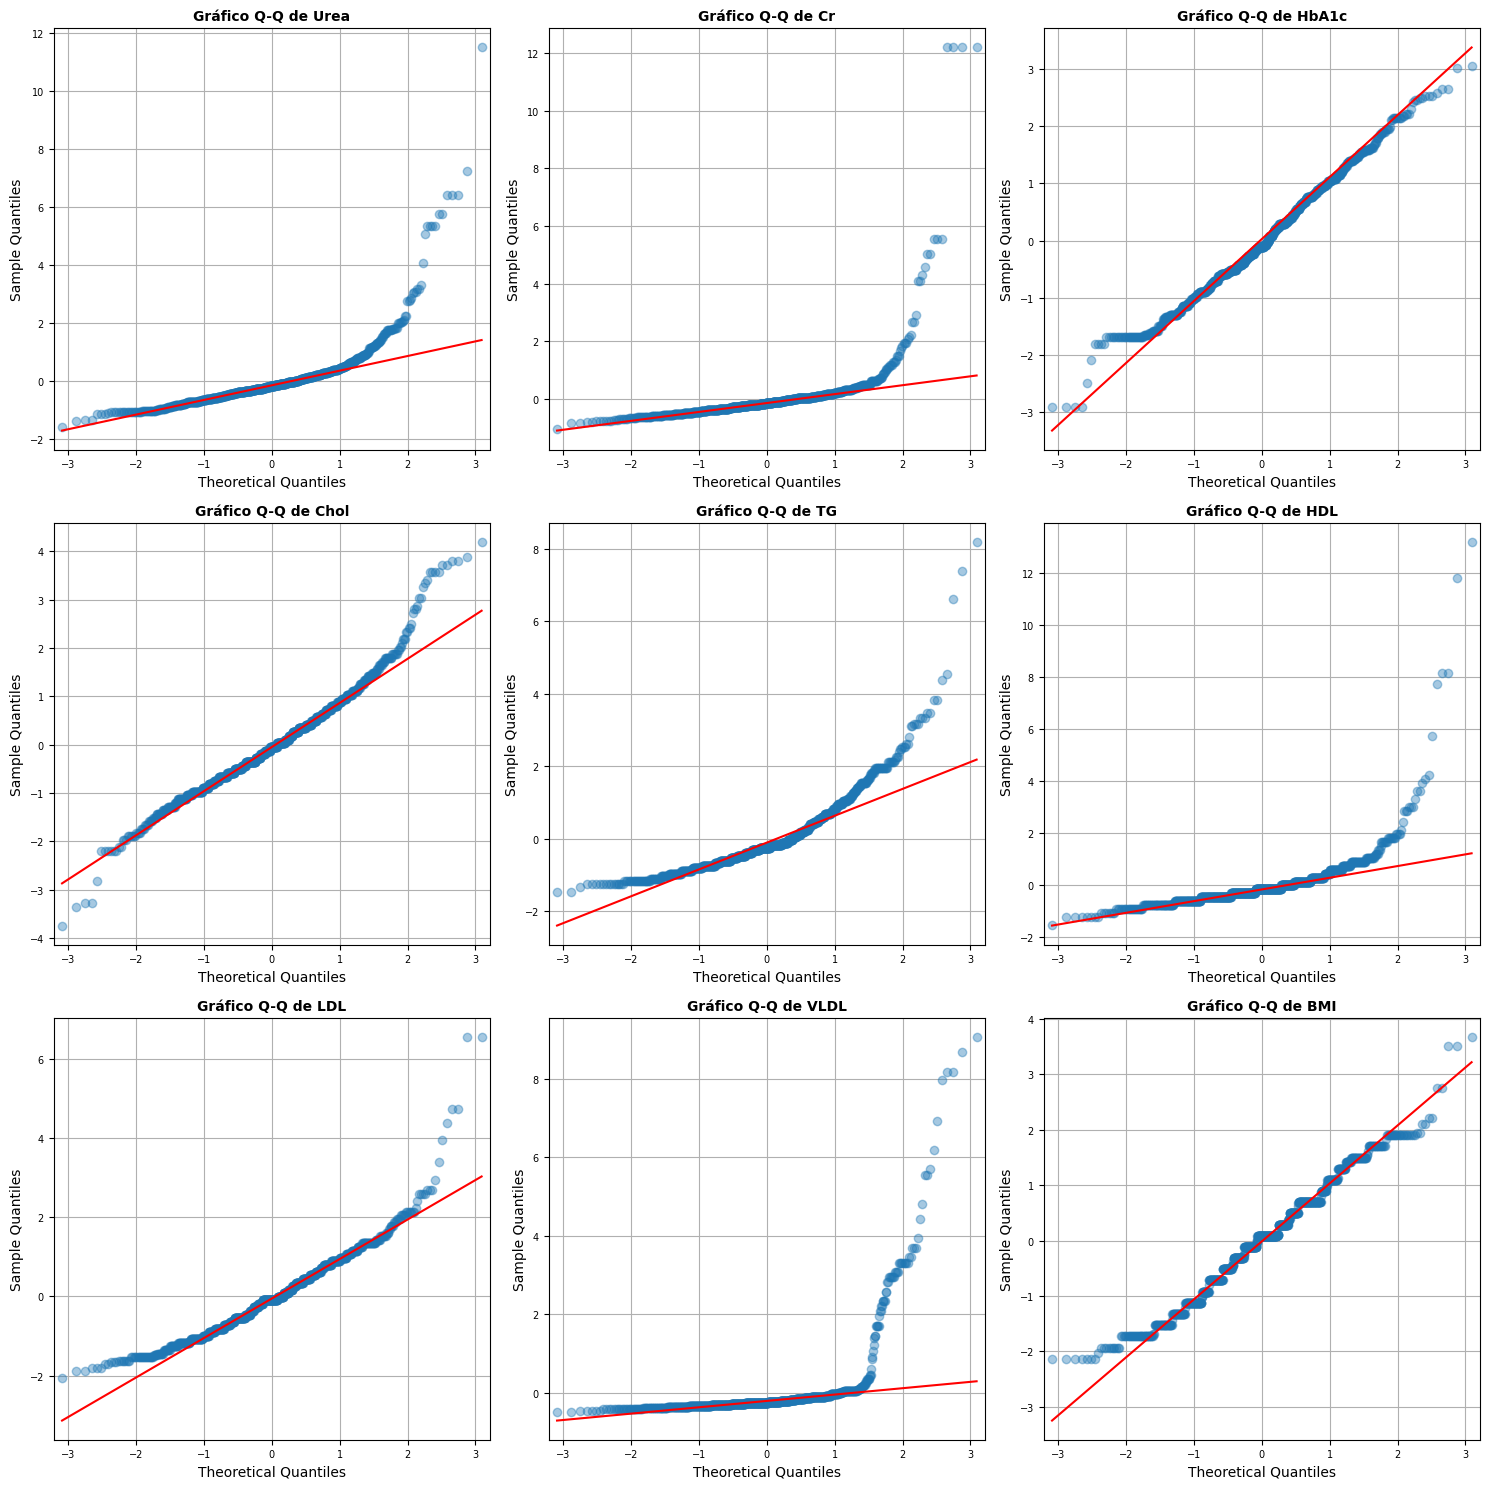

In [55]:
fig, ax = plt.subplots(ncols=3,nrows=3, figsize=(15,15))
for i in range(3):
    for j in range(3):
        sm.qqplot(df_datos_copy[columnas[i][j]],
                  fit=True,
                  line='q',
                  alpha=0.4,
                  lw=2,
                  ax= ax[i][j])
        ax[i][j].set_title(f'Gráfico Q-Q de {columnas[i][j]}', fontsize = 10,fontweight = "bold")
        ax[i][j].tick_params(labelsize = 7)
        ax[i][j].grid()
fig.tight_layout()
plt.savefig(r'\documents\Data_understanding\data_img\EDA_grafica_cuartiles_QQ.png')
plt.show()

#### **4.3.2. Correlaciones**

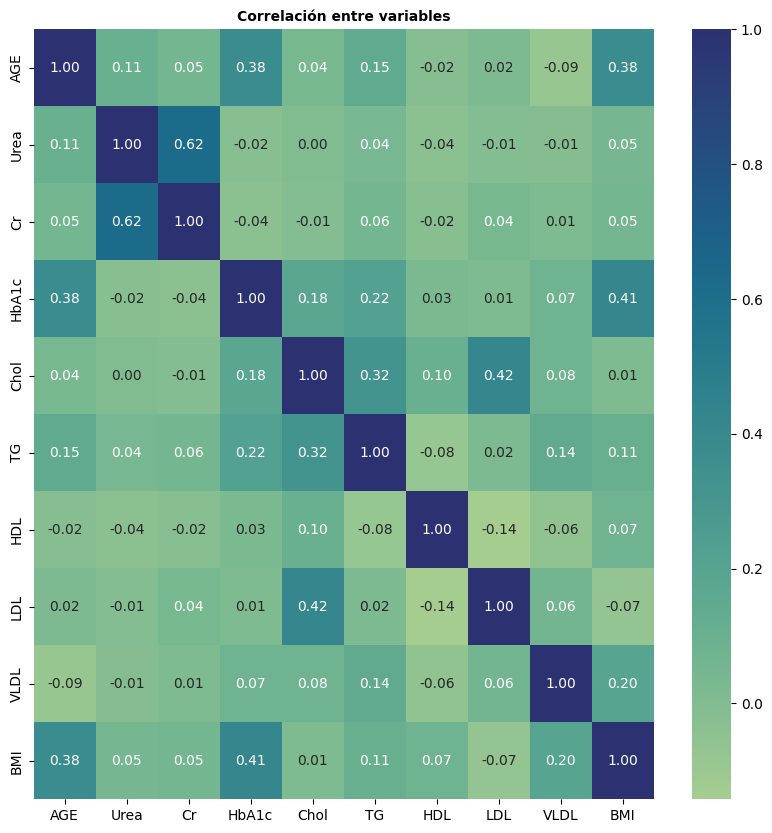

In [69]:
df_datos_copy_2 = df_datos[['AGE','Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL','BMI']]
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_datos_copy_2.corr(),ax=ax,annot=True,fmt='.2f',cmap='crest')
ax.set_title('Correlación entre variables',fontsize = 10,fontweight = "bold")
plt.savefig(r'\documents\Data_understanding\data_img\EDA_matriz_correlacion.png')
plt.show()

### **4.4. Relación entre la variable categórica género**

In [ ]:
df_datos_copy_2['Gender'] = df_datos.Gender.apply(lambda x: x.strip().upper())

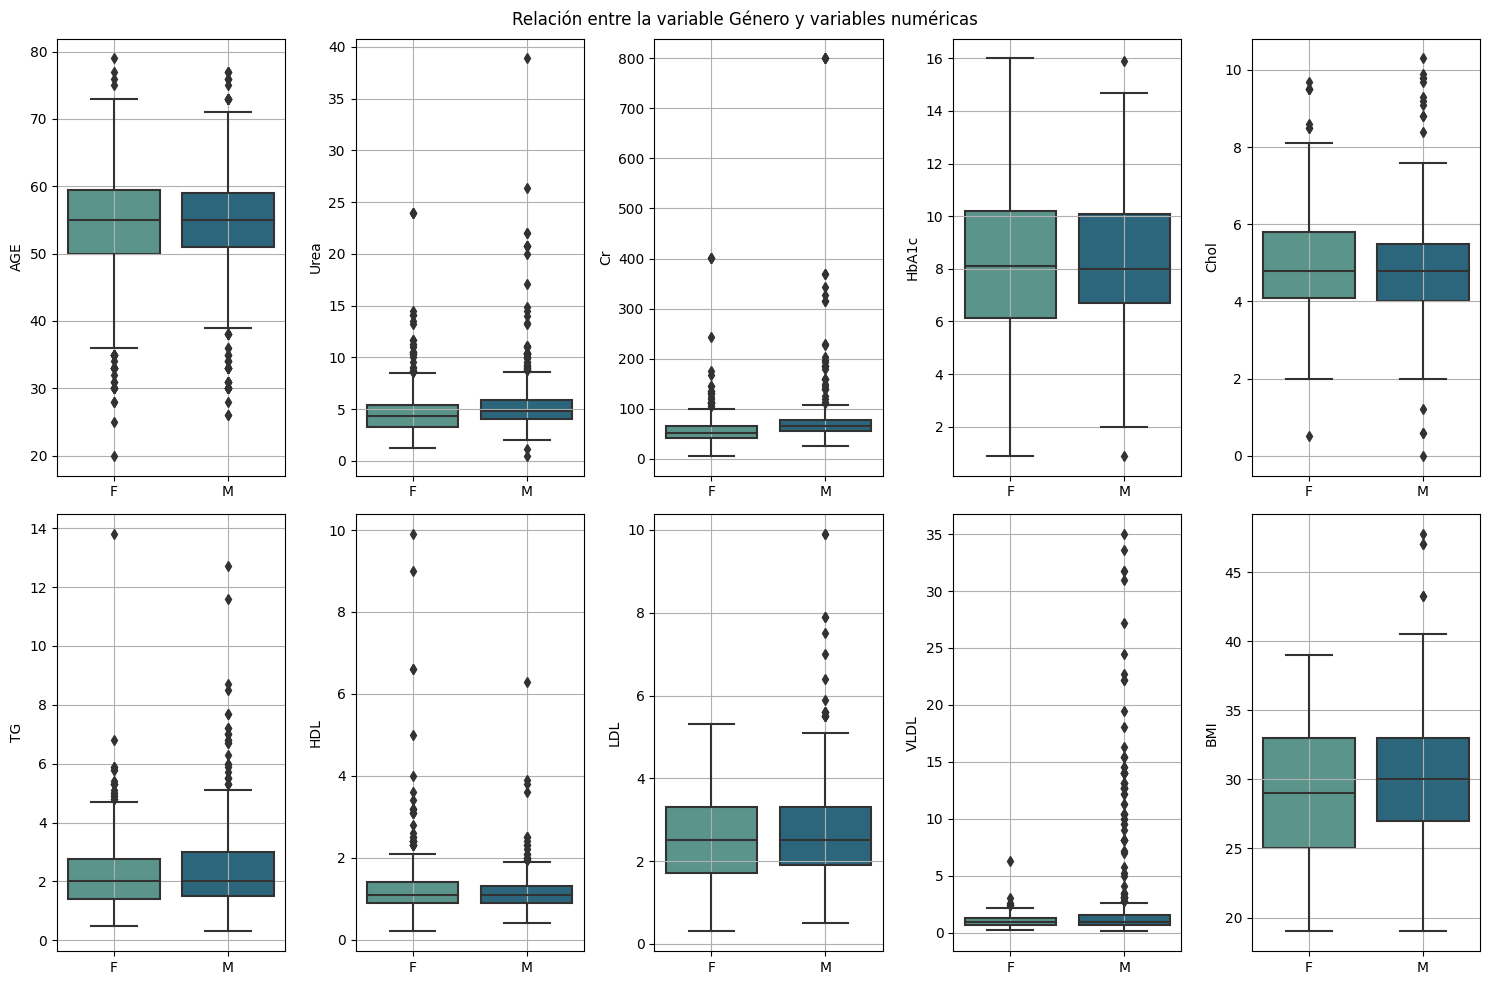

In [117]:
columnas_2 = df_datos_copy_2.columns.values[0:10].reshape(2,5)
fig, ax = plt.subplots(ncols=5,nrows=2, figsize=(15,10))
for i in range(2):
    for j in range(5):
        sns.boxplot(data=df_datos_copy_2,y=columnas_2[i][j],x='Gender',palette='crest',ax=ax[i][j])
        ax[i][j].grid()
        ax[i][j].set_xlabel('')
plt.suptitle('Relación entre la variable Género y variables numéricas')
plt.savefig(r'\documents\Data_understanding\data_img\EDA_relacion_genero.png')
fig.tight_layout()
plt.show()

## **5. Relaciones entre las variables y las variables objetivo**
---

In [120]:
#Vamos a modificar las clases para que solo queden las necesarias (Y,N,P)
df_datos['CLASS'] = df_datos.CLASS.apply(lambda x: x.strip().upper())
df_datos['Gender'] = df_datos.Gender.apply(lambda x: x.strip().upper())
df_datos.drop(['ID','No_Pation'],inplace=True,axis=1)
df_datos

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


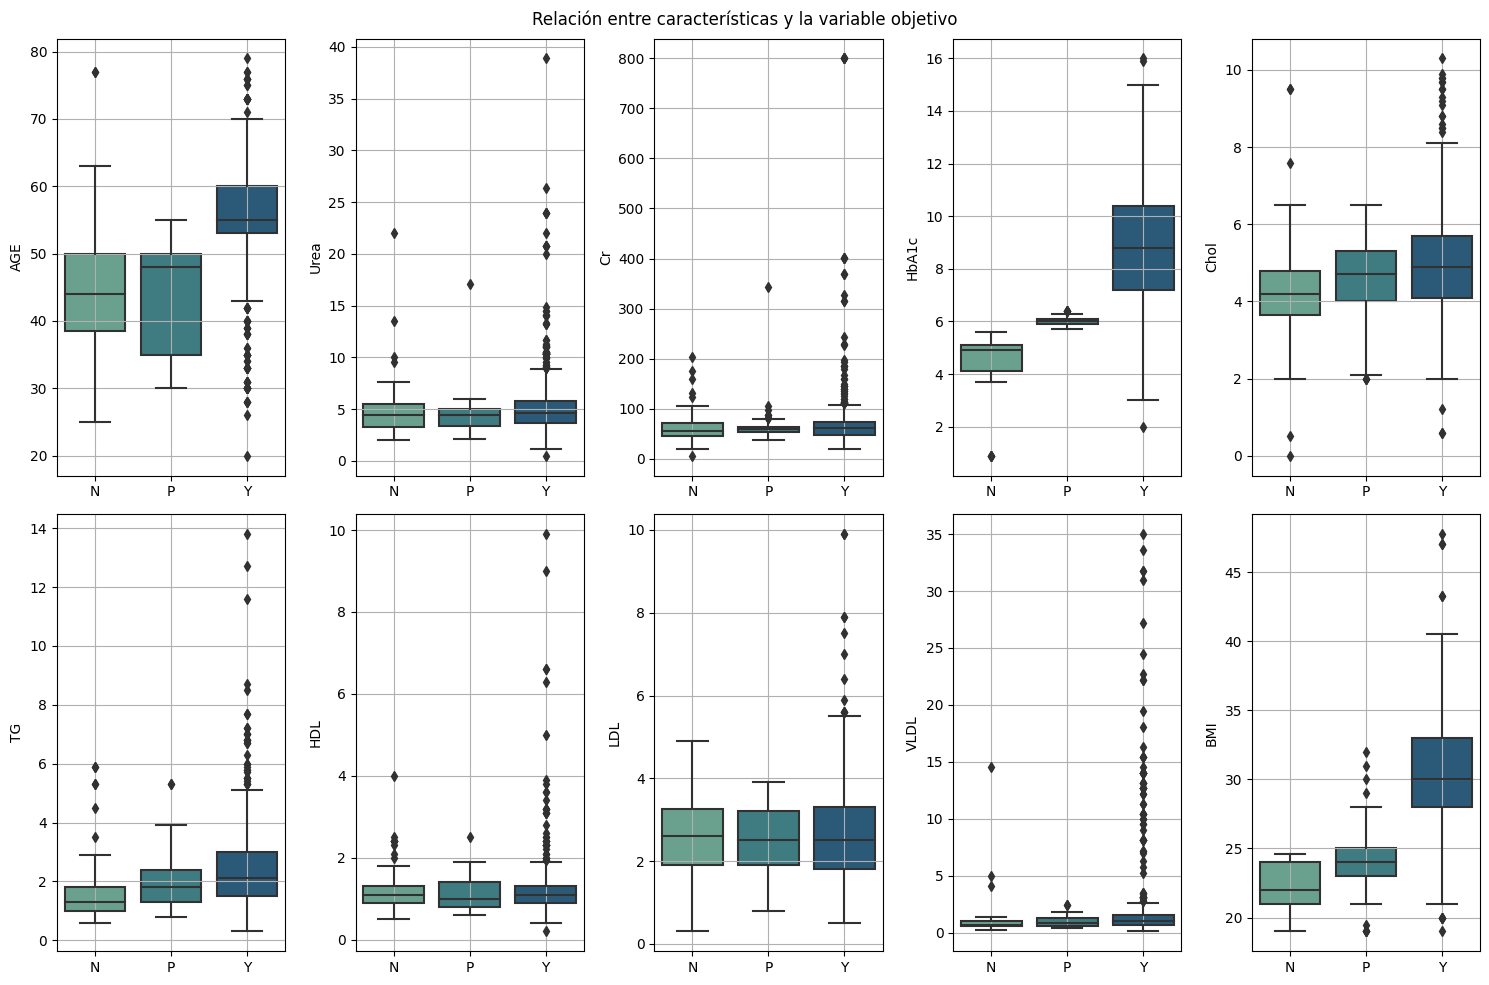

In [129]:
col = df_datos.columns.values[1:11].reshape(2,5)
fig, ax = plt.subplots(ncols=5,nrows=2, figsize=(15,10))
for i in range(2):
    for j in range(5):
        sns.boxplot(data=df_datos,y=col[i][j],x='CLASS',palette='crest',ax=ax[i][j])
        ax[i][j].grid()
        ax[i][j].set_xlabel('')
plt.suptitle('Relación entre características y la variable objetivo')
plt.savefig(r'\documents\Data_understanding\data_img\EDA_relacion_variable_objetivo.png')
fig.tight_layout()
plt.show()